# M1 --- Hotel data preprocessing 
#### Group members:  Zhihong Zhang


## Introduction 
In this practical challenge, I am going to explore a data set and finish neccessary data cleaning process. The data set was built upon a dataset of hotel booking from the Kaggle. As the first task of the instruction, the first goal of the task is to work on the data preparation. 

For the steps I will use in this challenge, Exploratory data analysis(EDA) will be launched firstly, and based on the EDA, I will apply Data preparation which includes tiding invalid values, dealing with missing value, adding/removing features for modeling, etc. After Data Prep, the EDA will be relaunched to verify my process. 

After cleaning up the data set, model building can be done for the interest. Since this assignment only require to do data preparation, it is already a nice stopping point. 
For the future work of this challenge, it can includes using general supervised machine learning tool to build an predictive model. 


##  Exploratory Data Analysis

The first thing of the task is to load the data set and check the rough view of these attributes. 

In [1]:
import numpy as np
import pandas as pd

# check and read the dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/steinszzh/AIProductStudio/master/M1hotelbookingdata/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Just through the first few lines of data, we knew there are some missing values under the agent and company column, we need to check carefully of the whole dataset. Also, based on this rough view of data, we knew it could be a nice data set to deal with the classification problems in supervised machine learning. It will be worthwhile for the hotel owner to predict whether a new booking may be canceled or not based on the given information.


Then the code was run to check the overview of the whole data set. And it is clear that there are 119390 rows of data.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Also, we can tell there are some null values across whole dataset. All missing data showed under children,country,angent and company column. To check clearer on exact quantity of missing value, I then run the following code 

In [3]:
#check null value 
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can tell that most missing data is shown under the company. In addition, an agent is another attribute that has a missing value which accounts for more than 8 percent. For the children attribute since it is less than 0.01% of the whole data set, we can directly throw away these four missing values and the impact is negligible. However, Considering the country or other attributes which have more missing data, that is more than 3 percent, we need some more careful checking of the data set. 

This data frame have 119390 rows and 32 variables. 



Most variables are very straightforward and we knew what it means just through the column name. 
I did some research on some ambigious columns to figure out some setting. The column which are researched are showed as follows:

- adr:average daily rate (ADR) measures the average rental revenue earned for an occupied room per day.

- lead_time: the time taken between when a customer makes a reservation and their actual arrival is called the Lead Time.



In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Based on these information, I had these findings and insights:

- mean of is_cancelled is 0.37, it implied that it is not a balanced attribute since we expect it to be around 0.5. below 0.5 means it has more 0 than 1 for a binary attribute.

- agent has a mean of 86 and highest value of 535. It means this is just categorical number, and most records are belong to these less than 600 agents. 





Before we did further action, we also need to convert column into right formats. 


To begin our data preparation, we will see each of the attributes firstly. In the general sense of the usage of this data set, it is valuable to use this binary data of cancellation. Here I use this attribute to be a starting point. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


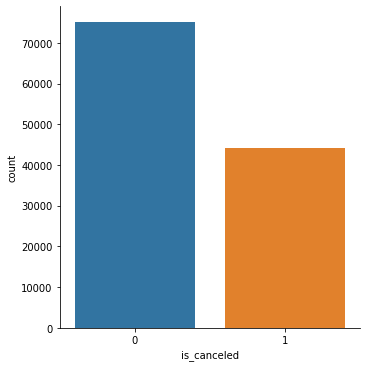

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.factorplot(x='is_canceled', data=df , kind='count' )#,aspect=2.5

Based on the canceliation distribution, we know it is also not quite balanced data, about 40% of the whole data set is the booking of cancelled. If we want to build a predictive model on cancellation of the customer, it will be problematic due to the null-error rate of 40%. This means we can just make a guess of all booking will not be cancelled regardless of other attributes and we are still be able get more than 60% correctness. Considering this result, 
I will use other techniques, such as weighted parameters in the algorithm or SMOTE, to deal with this imbalanced nature.

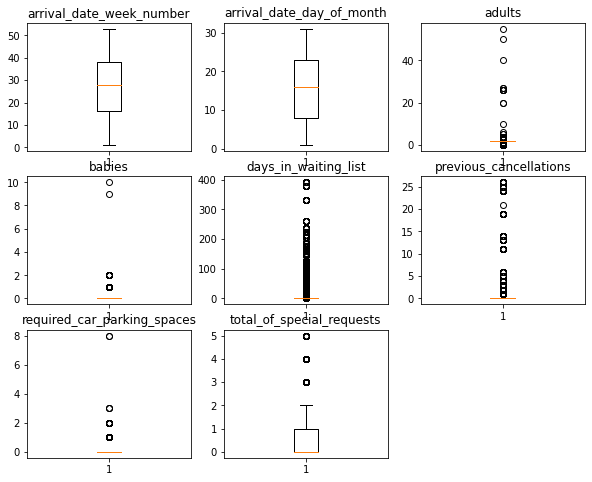

In [6]:

#numerical attribute
numerical = ['arrival_date_week_number', 'arrival_date_day_of_month', 'adults', 
             'babies','days_in_waiting_list','previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests']

# set figure size
fig = plt.figure(figsize=(10, 8))
i = 1
for f in numerical:
    plt.subplot(3, 3, i)
    plt.boxplot(df[f])
    plt.title(f)
    i += 1
plt.show()

In [7]:
# similarily, categorical data can also be seperated as well. 

To make sure our later model building will take effect, we will need to rebalance the data through either SMOTE technique or other balanced weight algorithm for the data.

In [8]:
#check the value dis
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Based on the prior knowledge, decision tree and random forest algorithm which does not require us to deal with imbalanced nature of the data. Also, based on our reference, the gradient boost algorithm has the advantage of dealing with the imbalanced nature of the data set. Therefore, based on the models we will use, the imbalanced nature of the data set should not be worried. Among all five models, built-in weighted parameters are used for all algorithms. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f139faf4e10>,
      dtype=object)

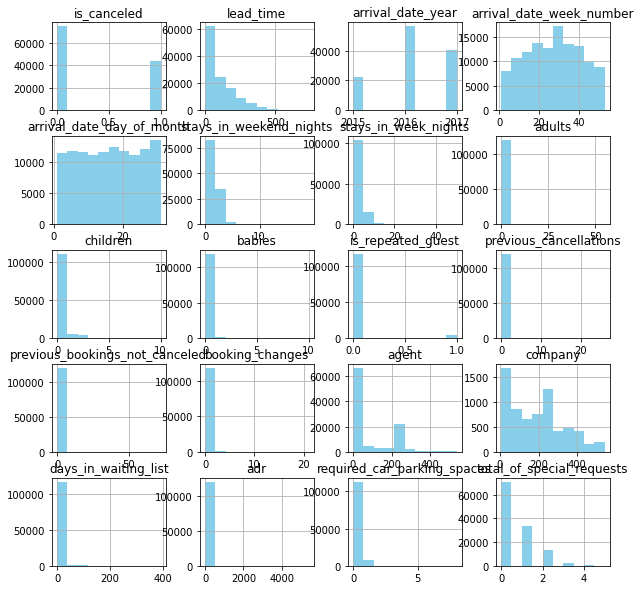

In [9]:
#plot numerical data histogram
df.hist(figsize=(10,10), color='skyblue')

From this basic histogram(which mixed numerical and categorical ordinal data), we can see that
- some attributes has some diverse distribution, such as total_of_special_request, lead time, company, arrival date week number . These may be useful attributes.
- Uniform-type distribution may not be a useful feature, such as arrival data day of the month. 
- Some attributes has a quite imbalanced distribution, and it may not be helpful on feature selection, such as adults,adr,babies,booking_changes, children, is_repeated_guest, required_car_parking_spaces. 

Then we print remaining categorical data.

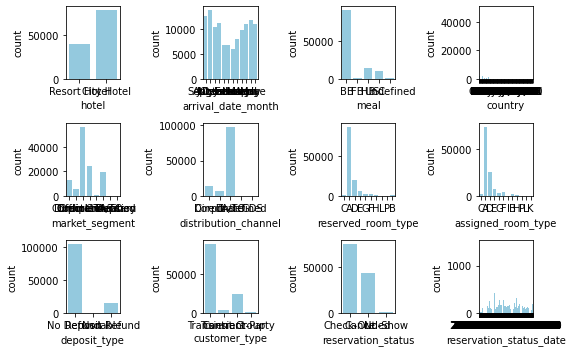

In [10]:
#plot categorical data
fig, axes =plt.subplots(3,4, figsize=(8,5)) #, sharex=True
axes = axes.flatten()


object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, df.dtypes[object_bol].index):
    sns.countplot(x=catplot, data=df, ax=ax, color = 'skyblue')
plt.tight_layout()  
plt.show()

From this count plot, we can see
- BB occupies majority of meal attributes. Due to the curiosity of the data value,  I also did research on meal term , following is their  meaning.  BB: Bed & Breakfast. - HB: Half Board (Breakfast and Dinner normally) - FB: Full Board (Beakfast, Lunch and Dinner) SC (Self Catering)

- only country term have very sparse distribution.



-

Then we are going to see their relationship.

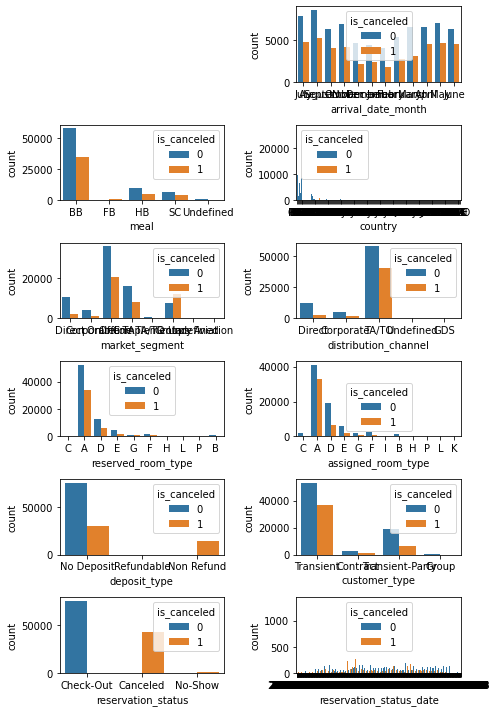

In [11]:
#relationship of categorical data 

fig, axes =plt.subplots(6,2, figsize=(7,10)) #, sharex=True
axes = axes.flatten() 
axes.flat[0].set_visible(False)
object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, df.dtypes[object_bol].index):
    sns.countplot(x=catplot,hue='is_canceled', data=df, ax=ax)#, color='skyblue'
plt.tight_layout()  
plt.show()

Based on this histogram, we have following findings:


- Based on the histogram above, we can see that FB term, it is more easy to be cancelled compared with other term. BB, HB and SC accounts of about the same percentage.

- Country and reservation_status_date certainly has many values, and it make graph a bit messy, we can later digger deeper in the value. Based on some rough check, we can tell in reservation_status_date, there is certain date cancelation is quite high and it can be a useful attributes for predicting cancellation.


- reservation status directly showed the colinearity with is_cancelled. It make sense that only people who does check out does not cancel the reservation. 

- under assigned_room_type, we can find Type A has a really high rate of cancellation and it may be a useful feature for feature selection. 






In [12]:

#categorical attribute
categorial = ['is_canceled','previous_bookings_not_canceled','days_in_waiting_list ','company', 'customer_type', 
              'reserved_room_type','reservation_status_date','reservation_status ', 'assigned_room_type',
              'agent', 'deposit_type', 'booking_changes']#TARGET, 



Then we will run heat map to check the coorelation of attributes.

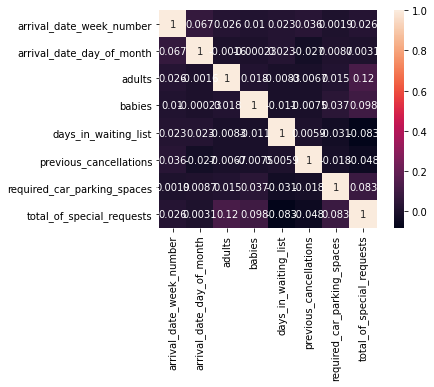

In [13]:
##relationship of numerical data--- Correlation Map
corr = df[numerical].corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

Although agent and company should be treated as categorical data

In [14]:
numerical2 = ['company','agent','arrival_date_week_number', 'arrival_date_day_of_month', 'adults', 'babies','days_in_waiting_list','previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests']

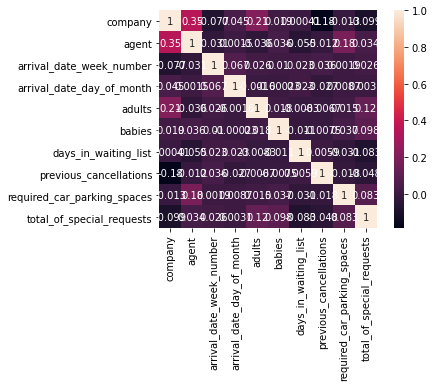

In [15]:
##relationship of numerical data--- Correlation Map
corr = df[numerical2].corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

Based on this heatmap/correlation matrix, we can have these findings and insights.

- Most numerical data does not have a strong correlation between each other, and it may not be a good idea to use interpolating or other technique to impute the missing values. 


- But there is certain coorelation between agent and company. Maybe we can use this property to deal with missing values. 



Next section we will deal with missing data.

## Data Preparation & Prepped Data Review


In this section, we will clear up data, moved out some meaningless values if exist.  The task I will perform in this section was shown as follows:

- Dealing with missing data or repetative data. 

- Check whether data is valid or not. Then if not, deal with invalid data.




### small amount of missing value

In [16]:
# clear children and country

df.dropna(subset=['children', 'country'], inplace=True)
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

After drop two small amount of missing data. We can re-run the histogram to see the new distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13ad049048>,
      dtype=object)

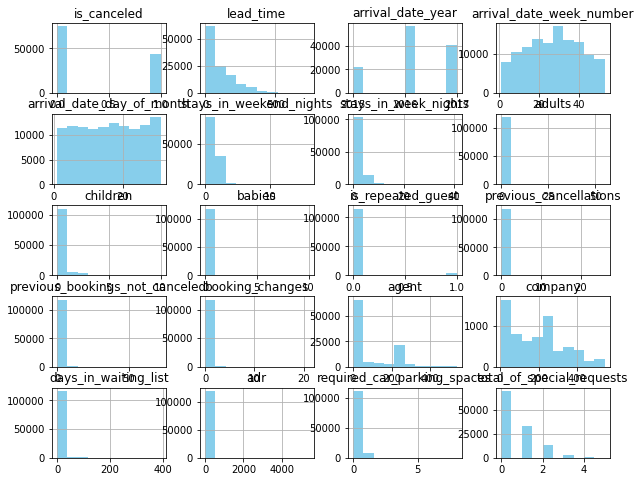

In [17]:
#plot histogram
df.hist(figsize=(10,8), color='skyblue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1399a4f7f0>,
      dtype=object)

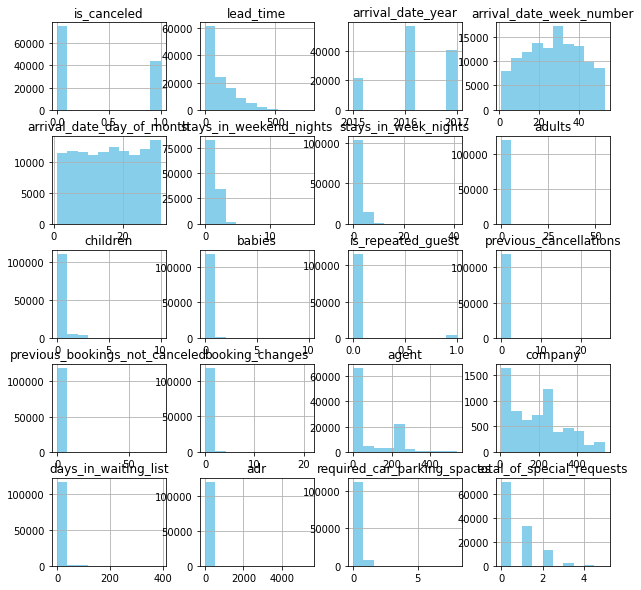

In [18]:
#plot numerical data histogram
df.hist(figsize=(10,10), color='skyblue')

Now we can see compared graph with before. The histogram does not really change much, the reason can be contributed to the fact that these invalid values are negligible compared with the whole data size. 

### large quantity of missing value

As we discovered earlier, large missing value in agent and company has certain colinearity. It make sense since commonly some company has cooperation with the agent. It is possible to use agent to predicting the value of the company. 
The only concern here is that both two attributes has a relatively large missing value, although agent missed about 10% of total data set. Before we deal with these missing value, we can actually check other duplicates first.  

### Check duplicates of the data set

Since there is no 

Since there is no primary key in the data set, we can only assigned to check column to see whethere there is duplicate

In [19]:
df[df[['hotel','is_canceled','arrival_date_year','stays_in_week_nights','distribution_channel','assigned_room_type','market_segment','adults','children','babies',
       'reserved_room_type','previous_cancellations','lead_time','total_of_special_requests', 'meal','arrival_date_month','adr','is_repeated_guest','deposit_type',
       'customer_type','agent', 'booking_changes','company','reservation_status_date','arrival_date_week_number', 'required_car_parking_spaces',
       'stays_in_weekend_nights','country','days_in_waiting_list','deposit_type','reservation_status']].duplicated() == True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


we got 32047 row of duplicates. When I manually check row 119352 to 119354 which 3 values are marked with duplicates, they are identical in every column. However, there are missing values in company and agent as well, we can not assert that they are identical in every part due to missing value of the column. I think it is possible that they are actually duplicates. 

In [20]:
# dropping ALL duplicte values but keep first showed 
df.drop_duplicates(subset =['hotel','is_canceled','arrival_date_year','stays_in_week_nights','distribution_channel','assigned_room_type','market_segment','adults','children','babies',
       'reserved_room_type','previous_cancellations','lead_time','total_of_special_requests', 'meal','arrival_date_month','adr','is_repeated_guest','deposit_type',
       'customer_type','agent', 'booking_changes','company','reservation_status_date','arrival_date_week_number', 'required_car_parking_spaces',
       'stays_in_weekend_nights','country','days_in_waiting_list','deposit_type','reservation_status'], 
                     keep = 'first', inplace = True)

In [34]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11833
company                           81822


Based on my knowledge, since there is colinearity between agent and company, the best thing we can do is actually avoid using company attribute. Instead,we use agent on future model building. It is not quite valid to use the data set has more 

In [56]:
## drop company
df.drop(["company"], axis = 1, inplace = True) 


In [58]:
df.isnull().sum()


hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11833
days_in_waiting_list                  0


In [62]:
#check amount of agents
df.agent.value_counts()

9.0      28757
240.0    12973
14.0      3347
7.0       3300
250.0     2763
         ...  
433.0        1
90.0         1
480.0        1
388.0        1
216.0        1
Name: agent, Length: 332, dtype: int64

Since we knew there are 332 unique values in company, we can use it to determin k

In [65]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=332)

In [72]:
# df_filled = imputer.fit_transform(df[numerical])

However, to use KNN, we need to clear up dataframe to make sure it is float only.  Based on one literature on comparision of various method, whose article is called evaluation of recent machine learning, said “deletion performed just as well as more complex imputation method” I decide to drop null value of agaent. Also, I will check distribution as well

In [74]:
# drop agent null value
df.dropna(subset=['agent'], inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Now we reprint distribution graph

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f138bcc1ac8>,
      dtype=object)

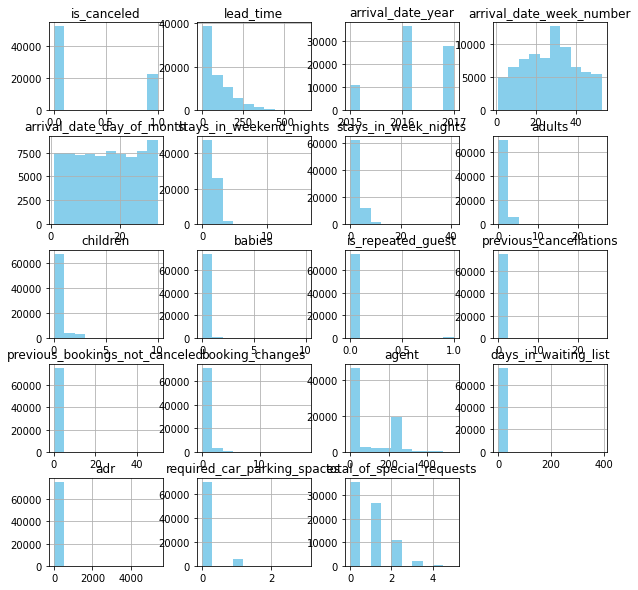

In [75]:
#plot numerical data histogram
df.hist(figsize=(10,10), color='skyblue')

We can tell although total amount of data points decreased, it does not change much on the distribution of the agent column. we will see with a large size of data set, it is close enough to the true population based on law of large numbers. 

Then we can compare with one extreme example which will drop all null values

## Make comparision with another method

In [52]:
## drop all missing value
newdf = pd.read_csv('https://raw.githubusercontent.com/steinszzh/AIProductStudio/master/M1hotelbookingdata/hotel_bookings.csv').copy()

newdf.dropna(axis=0,how='any', inplace=True )

In [53]:

newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           217 non-null    object 
 1   is_canceled                     217 non-null    int64  
 2   lead_time                       217 non-null    int64  
 3   arrival_date_year               217 non-null    int64  
 4   arrival_date_month              217 non-null    object 
 5   arrival_date_week_number        217 non-null    int64  
 6   arrival_date_day_of_month       217 non-null    int64  
 7   stays_in_weekend_nights         217 non-null    int64  
 8   stays_in_week_nights            217 non-null    int64  
 9   adults                          217 non-null    int64  
 10  children                        217 non-null    float64
 11  babies                          217 non-null    int64  
 12  meal                          

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13905270f0>,
      dtype=object)

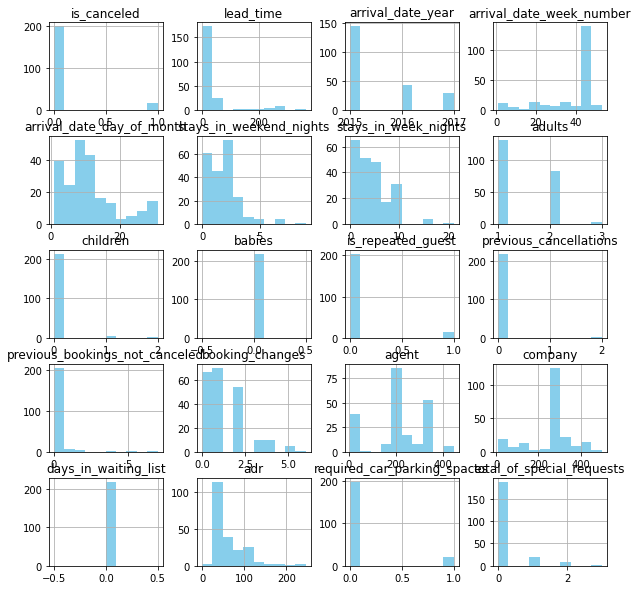

In [55]:
#
#plot numerical data histogram
newdf.hist(figsize=(10,10), color='skyblue')

It is definitely a bad idea to drop all null values. The shape, although the shape is similar in agent attribute. Many other attributes become bad, also it dramastically increase the variance.

## Conclusion

Based on the results , I believe this prepocessed data can be used for building model. we may need to use chi square test to verify categorical attributes on feature selection. overall, deletion gives a satisfying result. 

## Further work 
Later, it is possible to build predictive model based on current results. Since data set is relatively large, feedforward neural network can be used for modeling. 

## References

1. Tips about hotel meal https://support.travelrepublic.co.uk/Before-I-Book/BIB-Accommodation/1035827372/What-does-the-board-basis-mean.htm 



2. imbalanced data dealing https://datascience.stackexchange.com/questions/1107/quick-guide-into-training-highly-imbalanced-data-sets#:~:text=Gradient%20boosting%20is%20a%20principled,based%20on%20incorrectly%20classified%20examples.

3. https://medium.com/m/signin?actionUrl=%2F_%2Fbookmark%2Fp%2Fc4eb2a9954ad&operation=register&redirect=https%3A%2F%2Ftowardsdatascience.com%2Fdata-imputation-to-improve-model-performance

4. https://datascienceplus.com/knnimputer-for-missing-value-imputation-in-python-using-scikit-learn/

5. An overview and evaluation of recent machine learning from assigned reading. 